# Individual Assignment - Week 2

## Correlation Analysis Assignment

### Joshua Dollison
### CIS591-86718
### 9/3/2025

### General/Core functionality

In this code cell, I perform basic prepratory tasks

* Import libraries that I'll use later
* Define a custom function to exctract min/max vals
* Init data from use-case description

In [1]:
# import libraries
import calendar
import scipy.stats

# create a reusable function to find our min/max data per dataset
def get_min_max(data) :

    # find the key (month) of the max value in the dict
    # use the key to get the value
    max_month = max(data, key=data.get)
    max_value = data[max_month]

    # find the key (month) of the min value in the dict
    # use the key to get the value
    min_month = min(data, key=data.get)
    min_value = data[min_month]

    # return these values as a tuple
    return max_month, max_value, min_month, min_value
    
## I found it easier/more readable to first load the data into lists
##  - Then use the zip trick from the class video to build out our dictionaries

# Load month names from calendar - shows for
months = []
for month_num in range(1, 13):
    months.append(calendar.month_name[month_num])

# Temperatures (°F)
temperature = [40, 45, 55, 65, 75, 85, 90, 88, 86, 80, 70, 60]

# GreenTote sales
green_tote = [
    87500, 100625, 115725, 132075, 148875, 164500,
    172725, 185800, 180900, 170000, 165000, 160000
]

# SolarTrek Water Bottle sales
solar_trek_water_bottle = [
    80900, 85200, 92500, 100980, 110500, 118300,
    124800, 130500, 128800, 120000, 114000, 110000
]

### General Statistical Analysis

In this code cell, I perform the bulk of the given analysis tasks

* Load the provided data into dictionaries
* Print min/max unit sales and month data for the products
* Print min/max temperature and month data

In [2]:
# build out dicts
temperature = dict(zip(months, temperature))
green_tote = dict(zip(months, green_tote))
solar_trek_water_bottle = dict(zip(months, solar_trek_water_bottle))

#print(temperature)
#print(green_tote)
#print(solar_trek_water_bottle)

# column widths for formatting
COL1_W = 25
COL2_W = 18
COL3_W = 18
ROW_W = 67

# print out a header
print(
    f"{'Product':<{COL1_W}} | "
    f"{'Max Unit Sales':>{COL2_W}} | "
    f"{'Min Unit Sales':>{COL3_W}}"
)

# print our product data
print("-"*ROW_W)
max_month, max_value, min_month, min_value = get_min_max(green_tote)
print(
    f"{'GreenTote':<{COL1_W}} | "
    f"{max_month} : {max_value:>{COL2_W - len(max_month) - 3},} | "
    f"{min_month} : {min_value:>{COL3_W - len(min_month) - 3},}"
)

max_month, max_value, min_month, min_value = get_min_max(solar_trek_water_bottle)
print(
    f"{'SolarTrek Water Bottle':<{COL1_W}} | "
    f"{max_month} : {max_value:>{COL2_W - len(max_month) - 3},} | "
    f"{min_month} : {min_value:>{COL3_W - len(min_month) - 3},}"
)
print("-"*ROW_W)

# Print a fresh header for temp
print(
    f"{'':<{COL1_W}} | "
    f"{'Max Temperature':>{COL2_W}} | "
    f"{'Min Temperature':>{COL3_W}}"
)
print("-"*ROW_W)

# print min/max temps
max_month, max_value, min_month, min_value = get_min_max(temperature)
print(
    f"{'Temperature':<{COL1_W}} | "
    f"{max_month} : {max_value:>{COL2_W - len(max_month) - 3},} | "
    f"{min_month} : {min_value:>{COL3_W - len(min_month) - 3},}"
)
print("-"*ROW_W)

Product                   |     Max Unit Sales |     Min Unit Sales
-------------------------------------------------------------------
GreenTote                 | August :   185,800 | January :   87,500
SolarTrek Water Bottle    | August :   130,500 | January :   80,900
-------------------------------------------------------------------
                          |    Max Temperature |    Min Temperature
-------------------------------------------------------------------
Temperature               | July :          90 | January :       40
-------------------------------------------------------------------


### General Correlation Analysis

In this code cell, I perform the prescribed correlation analysis tasks

* For each given analysis pair
  * Calc r and p using the pearsonr method of the scipy.stats library
  * Display the results in a well-formatted way

In [3]:
# print out a header
print(
    f"{'Comparison':<{COL1_W}} | "
    f"{'Corr. Coeff.':>{COL2_W}} | "
    f"{'P-Value':>{COL3_W}}"
)
print("-"*ROW_W)

# calc/display coeff and p-value for greentote v solartrek
r, p = scipy.stats.pearsonr(list(green_tote.values()), list(solar_trek_water_bottle.values()))
print(
    f"{'GreenTote v SolarTrek':<{COL1_W}} | "
    f"{r:>{COL2_W}.3f} | "
    f"{p:>{COL3_W}.10f}"
)

# calc/display coeff and p-value for temp v greentote
r, p = scipy.stats.pearsonr(list(temperature.values()), list(green_tote.values()))
print(
    f"{'Temperature v GreenTote':<{COL1_W}} | "
    f"{r:>{COL2_W}.3f} | "
    f"{p:>{COL3_W}.10f}"
)

# calc/display coeff and p-value for temp v solartrek
r, p = scipy.stats.pearsonr(list(temperature.values()), list(solar_trek_water_bottle.values()))
print(
    f"{'Temperature v SolarTrek':<{COL1_W}} | "
    f"{r:>{COL2_W}.3f} | "
    f"{p:>{COL3_W}.10f}"
)


Comparison                |       Corr. Coeff. |            P-Value
-------------------------------------------------------------------
GreenTote v SolarTrek     |              0.988 |       0.0000000019
Temperature v GreenTote   |              0.925 |       0.0000165562
Temperature v SolarTrek   |              0.961 |       0.0000006591


### Analysis Interpretation

* All returned correlation coefficients meet the definition of "correlation is very strong" as given by the Week 1 presentation
  * Customers who buy the GreenTote product tend to buy the SolarTrek product
  * Customer purchases of both products tend to increase with the temperature
* All returned p-values are far below the threshold of 0.05, signifying that the relationships are statistically significant and not due to random chance

### Recommendation

We are provided with three options to choose from, pending the results of our analysis:
* Option 1: Develop a joint marketing campaign for the two products.
  * We would expect to choose this option if GreenTote v SolarTrek were proven to be correlated
* Option 2: Develop separate marketing campaigns for each product.
  * We would expect to choose this option if GreenTote v SolarTrek were proven to be uncorrelated
* Option 3: Explore external factors (e.g., weather, customer preferences) for future analysis.
  * We would expect to choose this option if temperature was proven to be correlated with product unit sales
 
Given our results we see that we can immediately rule out Option 2, as our products had a strong correlation.

This leaves Options #1 and #3.  Our data would support either option.  However, given that we can only choose one, the correlation between products is greater than the correlation between temperature and any product (or even their average - r = 0.943).

<div class="alert alert-block alert-success">
    Therefore, my <b><u>recommendation</u></b> is <b>Option 1:</b> Develop a joint marketing campaign for the two products.</div>


### Extra

A visualization of the dataset correlation comparisons that were performed.

Yep...they all appear to have a linear relationship!

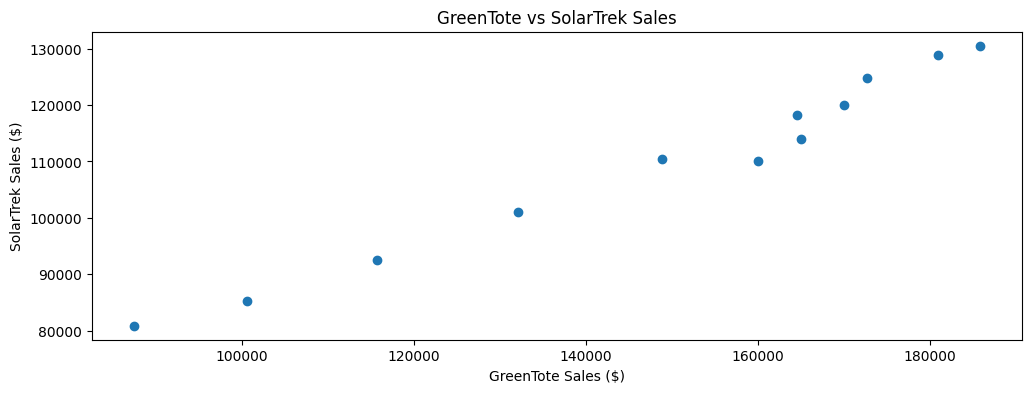

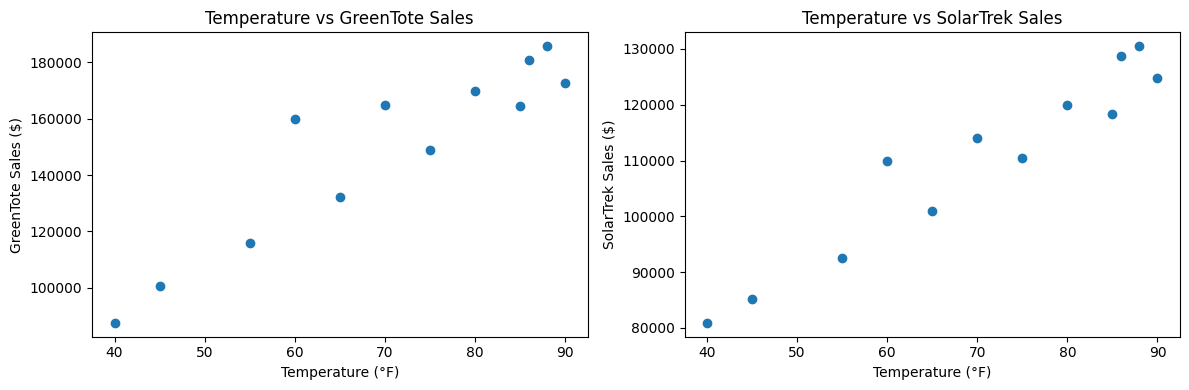

In [4]:
# Simple scatterplots to visualize correlations
import matplotlib.pyplot as plt

# Plot GreenTote vs SolarTrek
plt.figure(figsize=(12,4))
plt.scatter(list(green_tote.values()), list(solar_trek_water_bottle.values()))
plt.title("GreenTote vs SolarTrek Sales")
plt.xlabel("GreenTote Sales ($)")
plt.ylabel("SolarTrek Sales ($)")
plt.show()

# Plot Temperature vs Sales
plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
plt.scatter(list(temperature.values()), list(green_tote.values()))
plt.title("Temperature vs GreenTote Sales")
plt.xlabel("Temperature (°F)")
plt.ylabel("GreenTote Sales ($)")

plt.subplot(1, 2, 2)
plt.scatter(list(temperature.values()), list(solar_trek_water_bottle.values()))
plt.title("Temperature vs SolarTrek Sales")
plt.xlabel("Temperature (°F)")
plt.ylabel("SolarTrek Sales ($)")

plt.tight_layout()
plt.show()